In [ ]:
# Por inconvenientes con las sesiones del colab, tuve que trabajar directamente en mi computador todo el ejercicio.

from shutil import copyfile
import os

# drive_path = '/media/camilo/Data/udea-specializa0tion/'
drive_path = '/media/camilo/centos_home/culian/actsell_innref_com/Camilo'
base_path = os.path.join(drive_path, 'final')
iter_path = os.path.join(base_path, 'iter1')
data_path = os.path.join(iter_path, 'data')

if not os.path.exists(data_path):
    os.makedirs(data_path)

# drive.mount(drive_path, force_remount=True)
%cd $data_path

/media/camilo/centos_home/culian/actsell_innref_com/Camilo/final/iter1/data


In [ ]:
#Data management Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import random
import shutil

# Data Modeling Libraries
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Activation, Dropout, Flatten, Dense, Input, UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
c

%matplotlib inline

In [ ]:
# Ruta de la carpeta raiz
root_path = data_path

# Ruta de la carpeta artists
artists_root_path = root_path + '/images/images'

# Se obtiene la lista de carpetas
artists = os.listdir(artists_root_path)

# Arreglo para la lista de rutas de las pinturas de cada artista
folders = []

# Se obtienen los paths a cada una de las carpetas de los artistas
for artist in artists:
    folder  = os.path.join(artists_root_path, artist)
    folders.append(folder) 
    
# Arreglo para almacenar las rutas de las pinturas    
file_paths = []

# Arreglo de la lista de artistas (columna de interes)
labels = []

# Arreglo de la lista de nombres de obras
painting_names = []

# Se cargan los datos
for f, a in zip(folders, artists):
    folder_item = os.listdir(f)
    for f_i in folder_item:
        f_path = os.path.join (f, f_i)
        file_paths.append(f_path)
        labels.append(a.replace("_"," ").replace("u╠ê","ü"))
        painting_names.append(f_i)
        
# Se guardan los datos obtenidos en un dataframe
dataFrame = pd.DataFrame(list(zip(file_paths, painting_names, labels)), columns =['path', 'paint', 'name'])
dataFrame = pd.merge(dataFrame, df[["name","genre"]], on='name')
dataFrame


,path,paint,name,genre
0,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_1.jpg,Albrecht Dürer,Northern Renaissance
1,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_10.jpg,Albrecht Dürer,Northern Renaissance
2,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_100.jpg,Albrecht Dürer,Northern Renaissance
3,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_101.jpg,Albrecht Dürer,Northern Renaissance
4,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_102.jpg,Albrecht Dürer,Northern Renaissance
5,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_103.jpg,Albrecht Dürer,Northern Renaissance
6,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_104.jpg,Albrecht Dürer,Northern Renaissance
7,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_105.jpg,Albrecht Dürer,Northern Renaissance
8,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_106.jpg,Albrecht Dürer,Northern Renaissance
9,/media/camilo/centos_home/culian/actsell_innre...,Albrecht_Dürer_107.jpg,Albrecht Dürer,Northern Renaissance


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Data columns (total 4 columns):
path     8774 non-null object
paint    8774 non-null object
name     8774 non-null object
genre    8774 non-null object
dtypes: object(4)
memory usage: 342.7+ KB


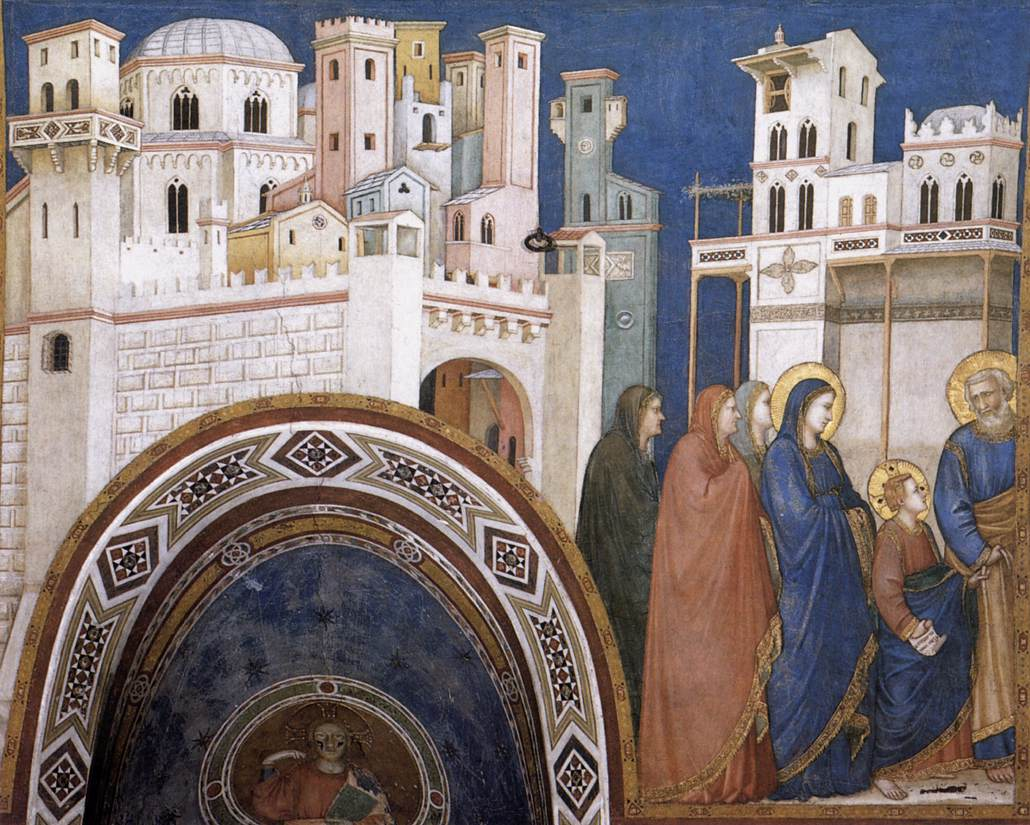

/media/camilo/centos_home/culian/actsell_innref_com/Camilo/final/iter1/data/images/images/Giotto_di_Bondone/Giotto_di_Bondone_98.jpg
(825, 1030, 3)


In [ ]:
index = random.randint(1, len(dataFrame))
display(Image(filename=dataFrame['path'][index]))
print(dataFrame['path'][index])
print(cv2.imread(dataFrame['path'][index]).shape)

In [ ]:
dataFrame['genre'].value_counts()

Impressionism             1647
Post-Impressionism        1048
Northern Renaissance      1008
Symbolism                  666
Baroque                    586
High Renaissance           556
Expressionism              469
Cubism                     439
Surrealism                 435
Primitivism                429
Romanticism                388
Pop Art                    181
Early Renaissance          164
Realism                    149
Suprematism                126
Proto Renaissance          119
Byzantine Art               99
Mannerism                   87
Neoplasticism               84
Social Realism              70
Abstract Expressionism      24
Name: genre, dtype: int64